<a href="https://colab.research.google.com/github/finesaaa/clustering-assignment/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import missingno

In [2]:
dataset = pd.read_csv("travel insurance.csv", nrows=10000)
dataset.head() 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                10000 non-null  object 
 1   Agency Type           10000 non-null  object 
 2   Distribution Channel  10000 non-null  object 
 3   Product Name          10000 non-null  object 
 4   Claim                 10000 non-null  object 
 5   Duration              10000 non-null  int64  
 6   Destination           10000 non-null  object 
 7   Net Sales             10000 non-null  float64
 8   Commision (in value)  10000 non-null  float64
 9   Gender                2084 non-null   object 
 10  Age                   10000 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [4]:
dataset.shape

(10000, 11)

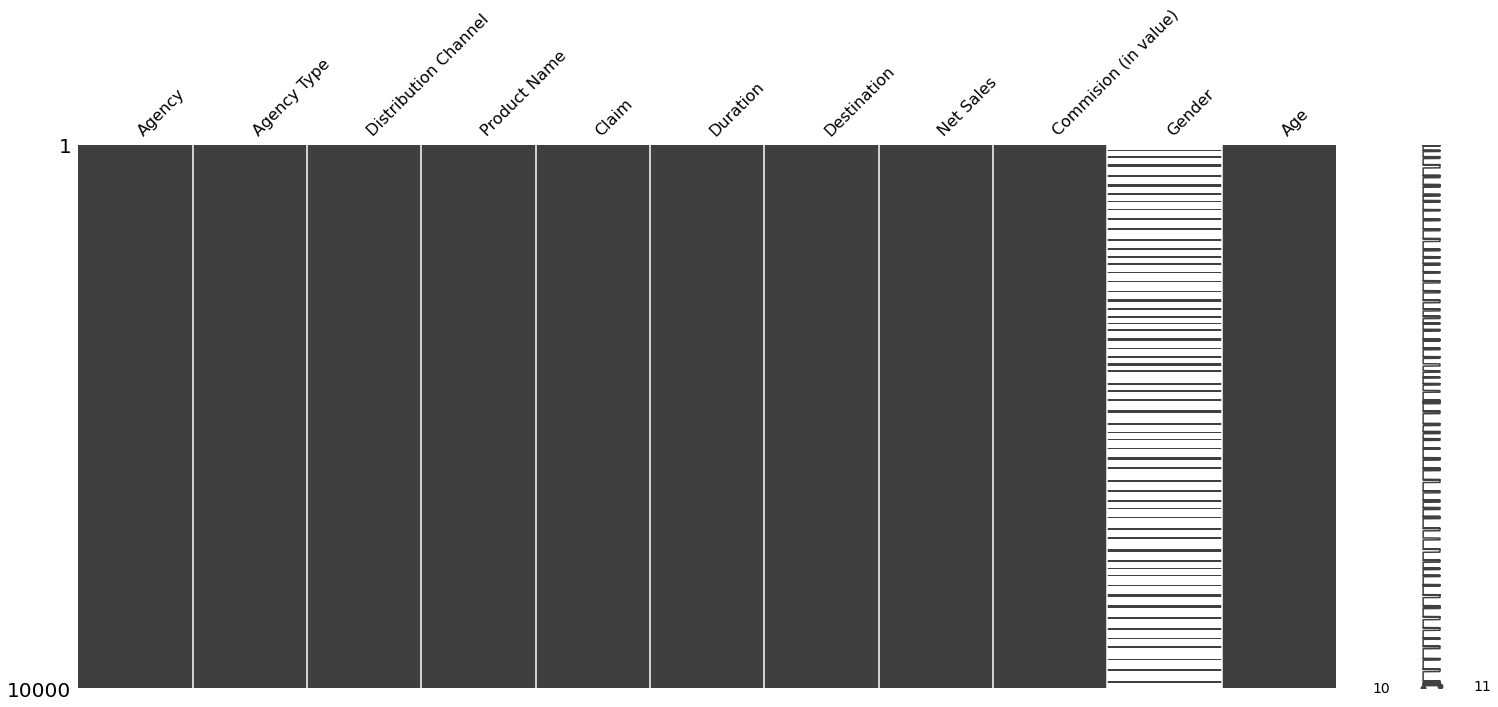

In [5]:
missingno.matrix(dataset)

In [6]:
dataset.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

In [7]:
dataset=dataset.drop(['Gender'], axis=1)
dataset.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Agency_Type']= label_encoder.fit_transform(dataset['Agency_Type'])

In [9]:
dataset

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
9995,EPX,1,Online,2 way Comprehensive Plan,No,97,SPAIN,54.0,0.00,36
9996,EPX,1,Online,2 way Comprehensive Plan,No,60,INDONESIA,20.0,0.00,36
9997,EPX,1,Online,2 way Comprehensive Plan,No,89,CHINA,40.0,0.00,36
9998,EPX,1,Online,2 way Comprehensive Plan,No,38,AUSTRALIA,58.0,0.00,36


In [10]:
selected_dataset = dataset[['Agency_Type','Duration','Net_Sales', 'Commision', 'Age']]
selected_dataset = pd.DataFrame(selected_dataset, columns=['Agency_Type','Duration','Net_Sales', 'Commision', 'Age'])
selected_dataset

,Agency_Type,Duration,Net_Sales,Commision,Age
0,1,186,-29.0,9.57,81
1,1,186,-29.0,9.57,71
2,1,65,-49.5,29.70,32
3,1,60,-39.6,23.76,32
4,1,79,-19.8,11.88,41
...,...,...,...,...,...
9995,1,97,54.0,0.00,36
9996,1,60,20.0,0.00,36
9997,1,89,40.0,0.00,36
9998,1,38,58.0,0.00,36


In [11]:
selected_dataset.describe()

,Agency_Type,Duration,Net_Sales,Commision,Age
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.785100,47.117500,36.000936,7.137918,40.111600
std,0.410773,114.333161,41.152577,15.488787,13.974651
min,0.000000,0.000000,-291.750000,0.000000,8.000000
25%,1.000000,10.000000,18.000000,0.000000,36.000000
50%,1.000000,23.000000,25.000000,0.000000,36.000000
75%,1.000000,54.000000,43.000000,7.700000,42.000000
max,1.000000,4881.000000,682.000000,184.140000,118.000000


## Remove Outliers

In [12]:
# Removing the outliers
def removeOutliers(data, col):
	Q3 = np.quantile(data[col], 0.75)
	Q1 = np.quantile(data[col], 0.25)
	IQR = Q3 - Q1
	
	print("IQR value for column %s is: %s" % (col, IQR))
	global outlier_free_list
	global filtered_data
	
	lower_range = Q1 - 1.0 * IQR
	upper_range = Q3 + 1.0 * IQR
	outlier_free_list = [x for x in data[col] if (
		(x > lower_range) & (x < upper_range))]
	filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in selected_dataset.columns:
	removeOutliers(selected_dataset, i)

# Assigning filtered data back to our original variable
cleaned_dataset = filtered_data
print("Shape of data after outlier removal is: ", cleaned_dataset.shape)

IQR value for column Agency_Type is: 0.0
IQR value for column Duration is: 44.0
IQR value for column Net_Sales is: 25.0
IQR value for column Commision is: 7.7
IQR value for column Age is: 6.0
Shape of data after outlier removal is:  (6902, 5)


In [13]:
# upper = np.where(selected_dataset['Duration'] >= (Q3+1.5*IQR))
# lower = np.where(selected_dataset['Duration'] <= (Q1-1.5*IQR))

In [14]:
# cleaned_dataset = selected_dataset.copy(deep=True)
# cleaned_dataset.drop(upper[0], inplace = True)
# cleaned_dataset.drop(lower[0], inplace = True)

In [15]:
cleaned_dataset #after remove outliers

,Agency_Type,Duration,Net_Sales,Commision,Age
2,1,65,-49.5,29.70,32
3,1,60,-39.6,23.76,32
4,1,79,-19.8,11.88,41
5,0,66,-121.0,42.35,44
6,1,47,-39.6,23.76,32
...,...,...,...,...,...
9994,1,9,20.0,0.00,36
9995,1,97,54.0,0.00,36
9996,1,60,20.0,0.00,36
9997,1,89,40.0,0.00,36


In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
normalized_dataset = MinMaxScaler().fit_transform(np.nan_to_num(cleaned_dataset))
normalized_dataset = pd.DataFrame(normalized_dataset, columns=cleaned_dataset.columns)
normalized_dataset

,Agency_Type,Duration,Net_Sales,Commision,Age
0,1.0,0.150812,0.266217,0.185185,0.0625
1,1.0,0.139211,0.279178,0.148148,0.0625
2,1.0,0.183295,0.305099,0.074074,0.6250
3,0.0,0.153132,0.172612,0.264060,0.8125
4,1.0,0.109049,0.279178,0.148148,0.0625
...,...,...,...,...,...
6897,1.0,0.020882,0.357204,0.000000,0.3125
6898,1.0,0.225058,0.401715,0.000000,0.3125
6899,1.0,0.139211,0.357204,0.000000,0.3125
6900,1.0,0.206497,0.383387,0.000000,0.3125


In [17]:
normalized_dataset.describe()

,Agency_Type,Duration,Net_Sales,Commision,Age
count,6902.000000,6902.000000,6902.000000,6902.000000,6902.000000
mean,0.880325,0.104502,0.377126,0.031371,0.352860
std,0.324605,0.138668,0.047047,0.085146,0.198461
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.023202,0.354585,0.000000,0.312500
50%,1.000000,0.053364,0.363749,0.000000,0.312500
75%,1.000000,0.127610,0.387314,0.000000,0.312500
max,1.000000,1.000000,1.000000,1.000000,1.000000


## TSNE


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0, n_components=3, verbose=1, perplexity=40)
tsne_results = tsne.fit_transform(normalized_dataset)

tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6902 samples in 0.035s...
[t-SNE] Computed neighbors for 6902 samples in 0.674s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6902
[t-SNE] Computed conditional probabilities for sample 2000 / 6902
[t-SNE] Computed conditional probabilities for sample 3000 / 6902
[t-SNE] Computed conditional probabilities for sample 4000 / 6902
[t-SNE] Computed conditional probabilities for sample 5000 / 6902
[t-SNE] Computed conditional probabilities for sample 6000 / 6902
[t-SNE] Computed conditional probabilities for sample 6902 / 6902
[t-SNE] Mean sigma: 0.003489
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.450165
[t-SNE] KL divergence after 1000 iterations: 0.447081


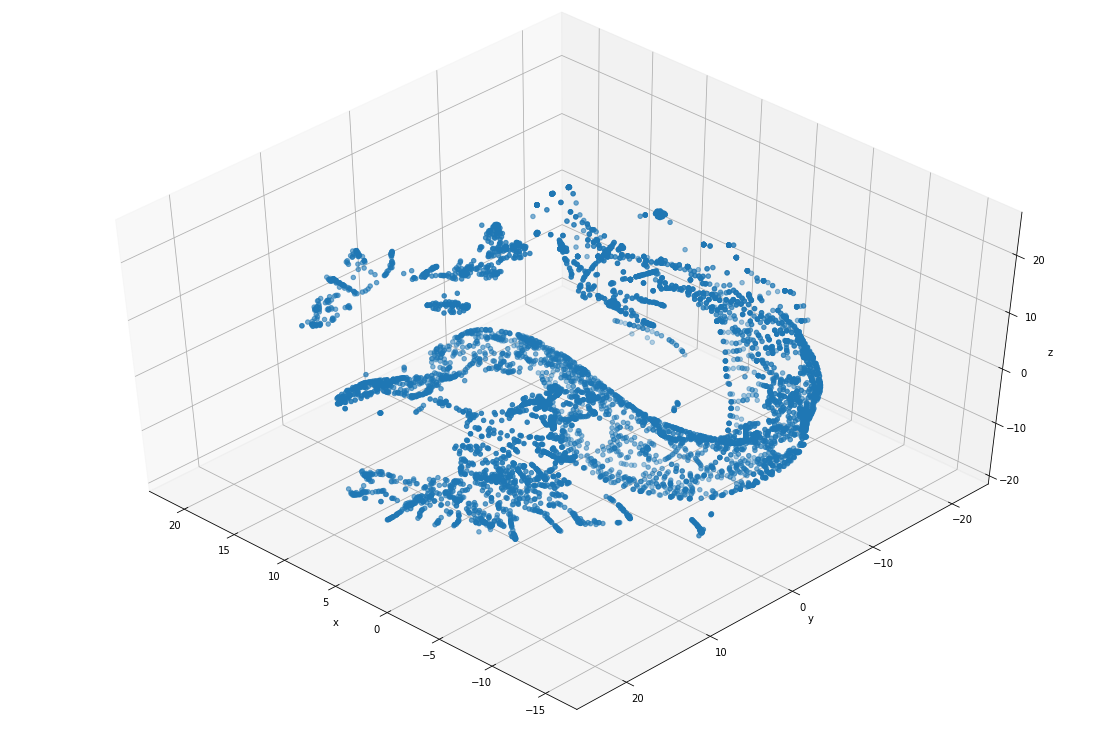

In [19]:
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'])

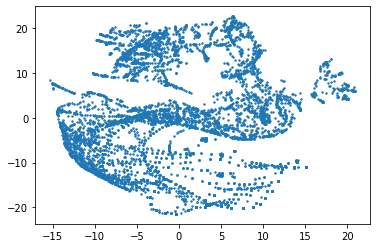

In [20]:
plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], s=2)
plt.show()

## Elbow Method

In [21]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeans_model = KMeans(init = "k-means++", n_clusters = k, n_init=12)
    kmeans_model.fit(normalized_dataset)
 
    distortions.append(sum(np.min(cdist(normalized_dataset, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / normalized_dataset.shape[0])
    inertias.append(kmeans_model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(normalized_dataset, kmeans_model.cluster_centers_,
                                   'euclidean'), axis=1)) / normalized_dataset.shape[0]
    mapping2[k] = kmeans_model.inertia_

In [22]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.3112343335376427
2 : 0.1857934546933856
3 : 0.16058876995084412
4 : 0.13825915679304193
5 : 0.12491150933861234
6 : 0.11781006862281279
7 : 0.10300352347699143
8 : 0.09117958574608061
9 : 0.08684865513795485
10 : 0.08377546507505798
11 : 0.0799812095086723
12 : 0.07762964340461594
13 : 0.07291590603219036
14 : 0.07157003025966281


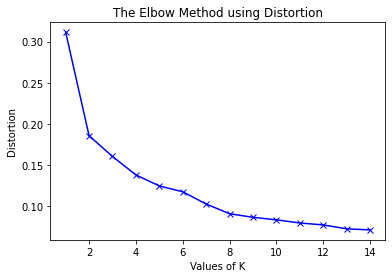

In [23]:
from matplotlib import pyplot as plt 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## Silhouette

In [24]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
K = range(2, 15)
 
for k in K:
    # Building and fitting the model
    kmeans_model = KMeans(init = "k-means++", n_clusters=k, n_init=12)
    kmeans_model.fit(normalized_dataset)
    cluster_labels = kmeans_model.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(normalized_dataset, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.758098828129167
For n_clusters=3, the silhouette score is 0.640646022053381
For n_clusters=4, the silhouette score is 0.5771391460998845
For n_clusters=5, the silhouette score is 0.5686628056553347
For n_clusters=6, the silhouette score is 0.5796145773699555
For n_clusters=7, the silhouette score is 0.6042290690513004
For n_clusters=8, the silhouette score is 0.5146946873561398
For n_clusters=9, the silhouette score is 0.5113699234374404
For n_clusters=10, the silhouette score is 0.5114815054455037
For n_clusters=11, the silhouette score is 0.5115427387318419
For n_clusters=12, the silhouette score is 0.5148325047571369
For n_clusters=13, the silhouette score is 0.4523462965756678
For n_clusters=14, the silhouette score is 0.4521505790010424


## KMeans 2 Clustering

In [25]:
cluster_num = 2
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_2 = k_means.labels_
print(labels_2)

[0 0 0 ... 0 0 0]


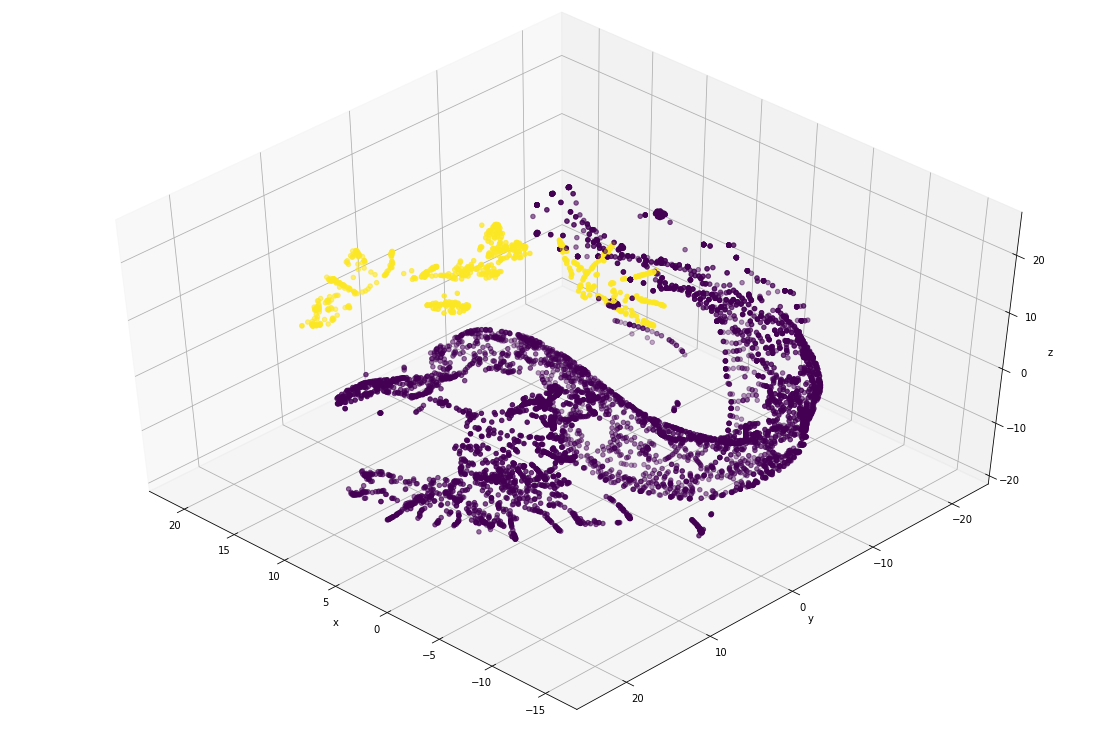

In [26]:
fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=labels_2)

## KMeans 3 Clustering

In [27]:
cluster_num = 3
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_3 = k_means.labels_
print(labels_3)

[0 0 2 ... 0 0 0]


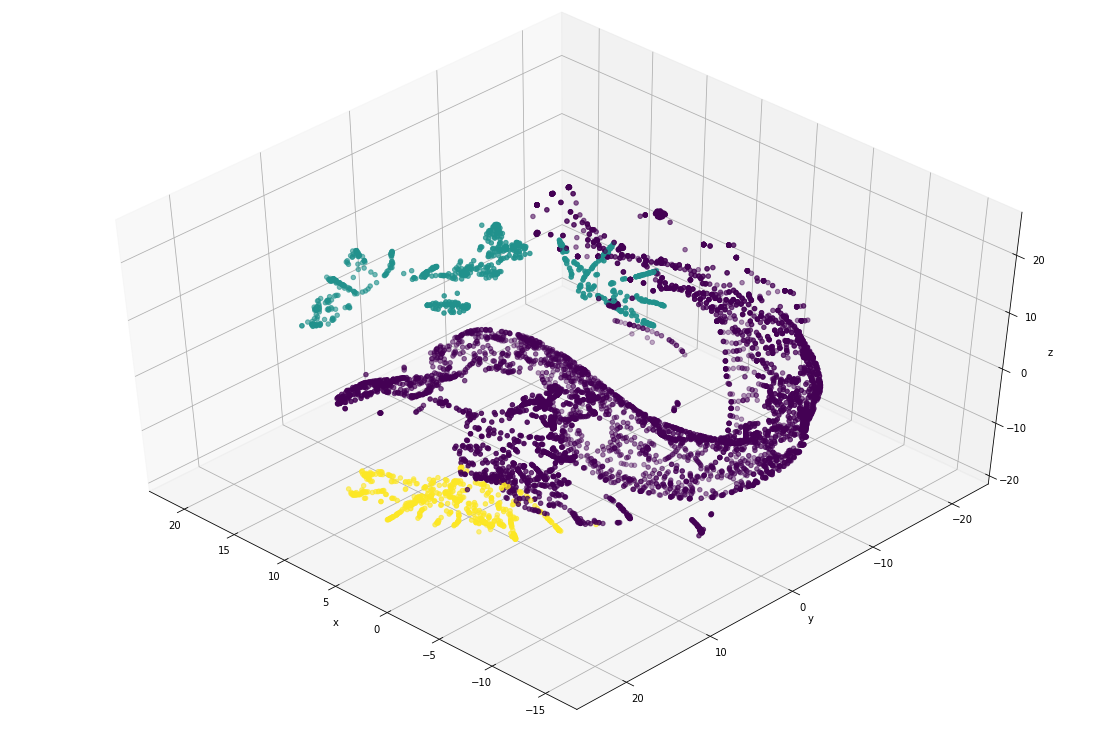

In [28]:
fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=labels_3)

## KMeans 4 Clustering

In [29]:
cluster_num = 4
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_4 = k_means.labels_
print(labels_4)

[0 0 2 ... 0 0 0]


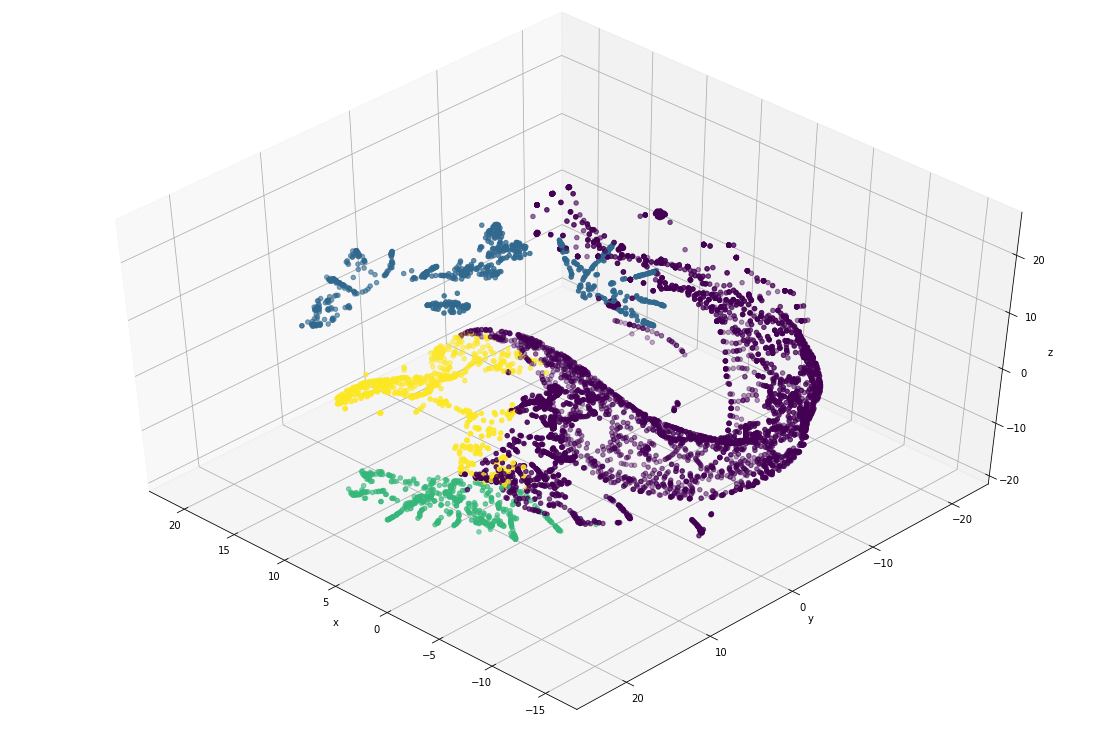

In [30]:
fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=labels_4)

## KMeans 5 Clustering

In [31]:
cluster_num = 5
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_5 = k_means.labels_
print(labels_5)

[0 0 3 ... 0 0 0]


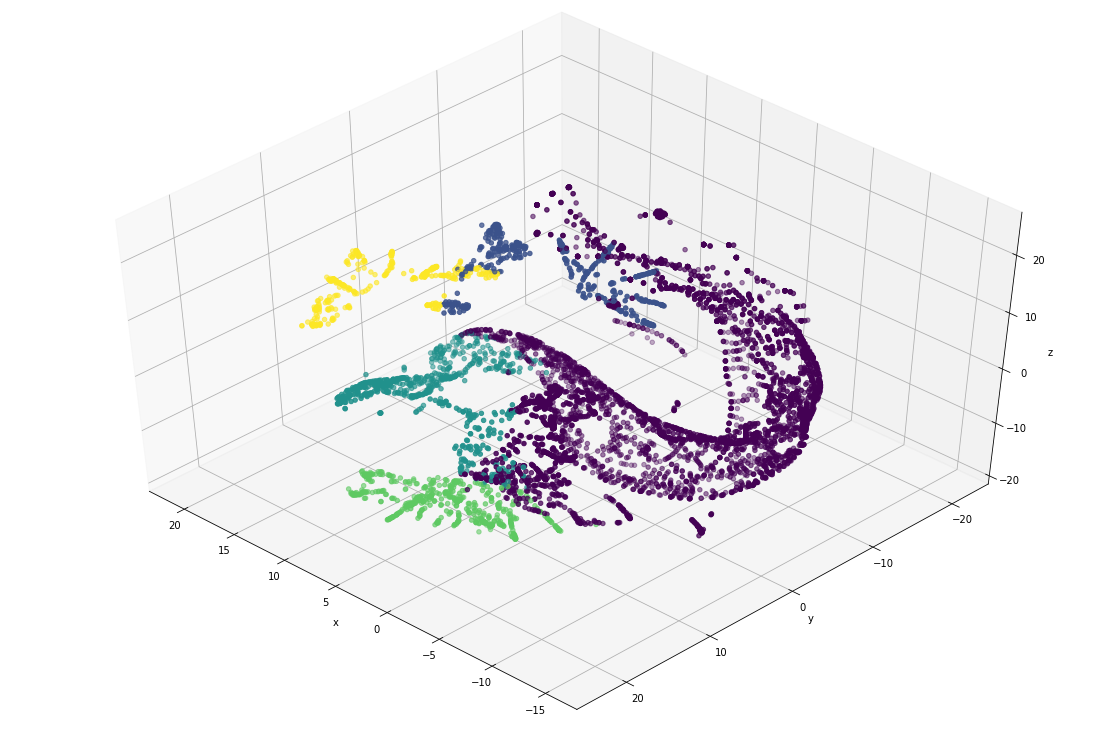

In [32]:
fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=labels_5)

## KMeans 8 Clustering

In [33]:
cluster_num = 8
k_means = KMeans(init = "k-means++", n_clusters = cluster_num, n_init=12)
k_means.fit(normalized_dataset)
labels_8 = k_means.labels_
print(labels_8)

[3 3 2 ... 5 5 0]


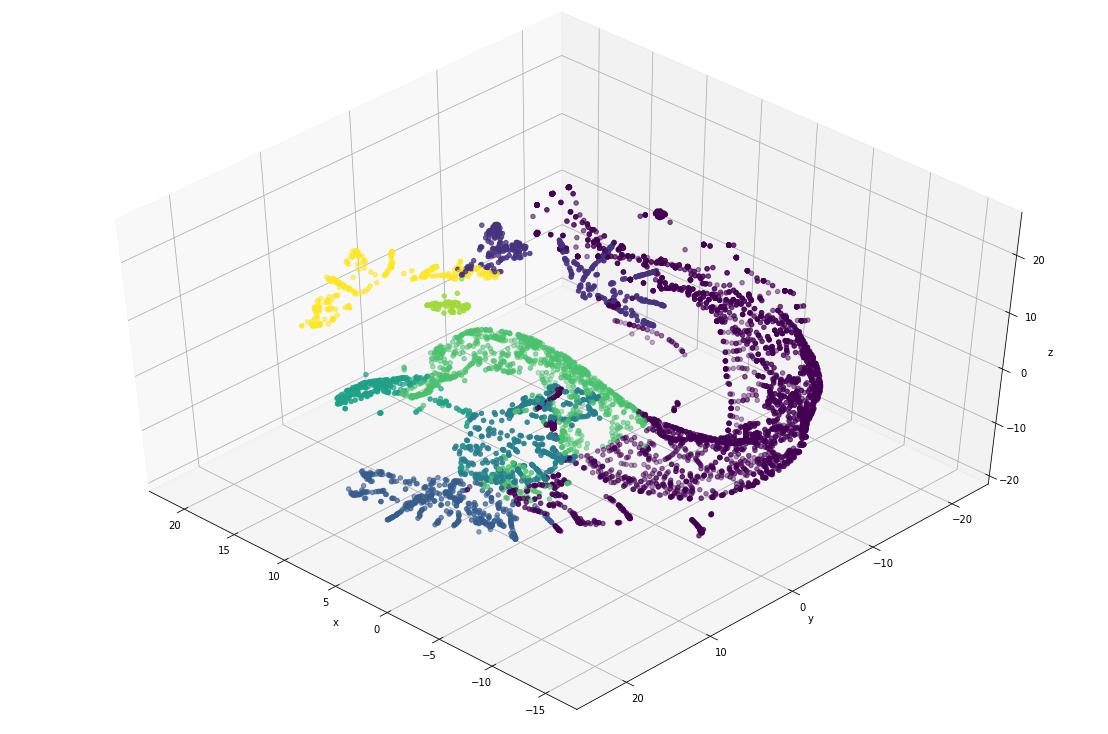

In [34]:
fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], tsne_results['tsne3'], c=labels_8)

In [35]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse=False)
# result = pd.DataFrame(encoder.fit_transform(dataset[['Distribution Channel']]))
# result

In [36]:
# column_names = dataset['Distribution Channel'].sort_values().unique()
# result.columns = 'D Channel (' + column_names + ')'
# result

In [37]:
# new_dataset = selected_dataset.copy(deep=True)
# new_dataset = new_dataset.join(result)
# new_dataset